In [9]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

from rtmag.process.paper.utils import get_label_xyz

from rtmag.process.paper.load import MyModel
device = "cpu"
import rtmag.process.paper.metric as m
from rtmag.process.paper.potential_field import get_potential_field
from rtmag.process.paper.opt_jit import relax
from rtmag.process.paper.opth import draw

In [2]:
isee_reference = "F:/isee_dataset/11158/label"
isee_reference = Path(isee_reference)
isee_reference_files = sorted(isee_reference.glob("*.npz"))


idx = 13
ref_path = isee_reference_files[idx]
print(ref_path.stem)
B, x, y, z = get_label_xyz(ref_path)

IndexError: list index out of range

In [3]:
np.save('isee.npy', B)

# Potential

In [4]:
B = np.load('isee.npy')
B.shape

(512, 256, 256, 3)

In [5]:
bottom = B[:, :, 0, :]
print(bottom.shape)

nx, ny, nz, _ = B.shape
print(nx, ny, nz)

(512, 256, 3)
512 256 256


In [6]:
bp = get_potential_field(bottom[..., 2], nz, l=0.5)

Potential Field:   0%|          | 71/16384 [00:04<19:02, 14.28it/s] 


KeyboardInterrupt: 

In [ ]:
np.save("pot.npy", bp)

In [10]:
res = m.evaluate(bp, B)
print()
print(f"sigmaJ_b: {res['sigmaJ_b']:.4f}")
print(f"div_b   : {res['div_b']:.4f}")
print(f"sigmaJ_B: {res['sigmaJ_B']:.4f}")
print(f"div_B   : {res['div_B']:.4f}")

C_vec     : 0.90
C_cs      : 0.77
E_n'      : 0.56
E_m'      : 0.37
eps       : 0.76
sigmaJ_b  : 0.80
div_b     : 0.00
sigmaJ_B  : 0.69
div_B     : 0.00
sig100_b  : 79.60
div100_b  : 0.06
sig100_B  : 68.57
div100_B  : 0.22

sigmaJ_b: 0.7960
div_b   : 0.0006
sigmaJ_B: 0.6857
div_B   : 0.0022


# Optimization

In [2]:
B = np.load('isee.npy')
bottom = B[:, :, 0, :]
print(bottom.shape)

(512, 256, 3)


In [3]:
bp = np.load("pot.npy")
bp.shape

(512, 256, 256, 3)

In [4]:
bp[:, :, 0, :] = bottom

In [5]:
from time import perf_counter

In [6]:
start_time = perf_counter()

br = relax(bp, 'opt')

end_time = perf_counter()
total_time = end_time - start_time
print(f"Total time: {total_time:.2f}s")

nx, ny, nz =  512 256 256
Lx, Ly, Lz =  tensor(1.4156) tensor(0.7064) tensor(0.7064)
dx, dy, dz =  tensor(0.0028) tensor(0.0028) tensor(0.0028)
Bave =  tensor(179.2982)
maxit =  10000
mue =  tensor(7.6743e-07)
it =  0 L =  tensor(726.4991, device='cuda:0') F =  tensor(890.4728, device='cuda:0') Li =  tensor(1.4391, device='cuda:0') Fi =  tensor(19.5545, device='cuda:0')
grad L/L tensor(1., device='cuda:0')
it =  10 L =  tensor(250.0910, device='cuda:0') F =  tensor(413.1221, device='cuda:0') Li =  tensor(64.1924, device='cuda:0') Fi =  tensor(274.7906, device='cuda:0')
grad L/L tensor(1.9049, device='cuda:0')
it =  20 L =  tensor(186.8866, device='cuda:0') F =  tensor(330.1678, device='cuda:0') Li =  tensor(86.5153, device='cuda:0') Fi =  tensor(335.1243, device='cuda:0')
grad L/L tensor(0.3382, device='cuda:0')
it =  30 L =  tensor(164.9818, device='cuda:0') F =  tensor(308.0805, device='cuda:0') Li =  tensor(85.7018, device='cuda:0') Fi =  tensor(358.9944, device='cuda:0')
grad L/L t

In [7]:
np.save("opt.npy", br)

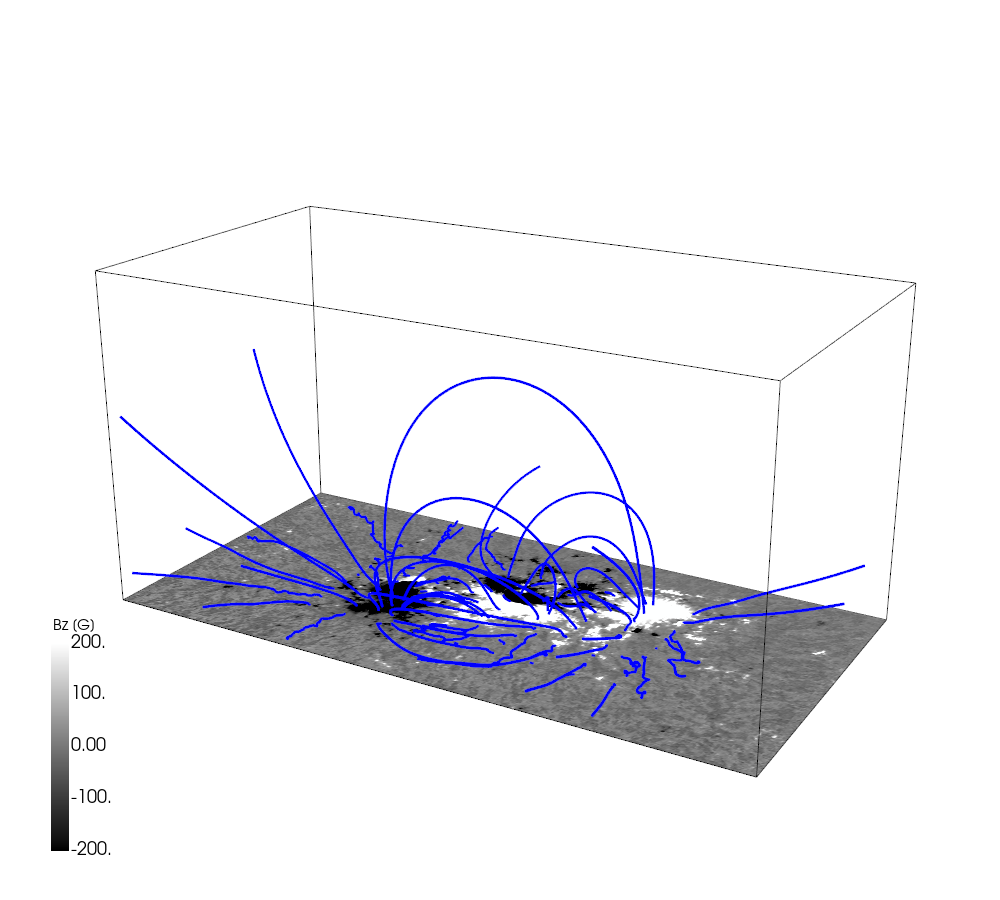

In [10]:
draw(br, radius=1)

In [11]:
res = m.evaluate(br, B)
print()
print(f"sigmaJ_b: {res['sigmaJ_b']:.4f}")
print(f"div_b   : {res['div_b']:.4f}")
print(f"sigmaJ_B: {res['sigmaJ_B']:.4f}")
print(f"div_B   : {res['div_B']:.4f}")

C_vec     : 0.94
C_cs      : 0.77
E_n'      : 0.59
E_m'      : 0.36
eps       : 0.82
sigmaJ_b  : 0.39
div_b     : 0.00
sigmaJ_B  : 0.69
div_B     : 0.00
sig100_b  : 39.18
div100_b  : 0.36
sig100_B  : 68.57
div100_B  : 0.22

sigmaJ_b: 0.3918
div_b   : 0.0036
sigmaJ_B: 0.6857
div_B   : 0.0022


# AI

In [12]:
meta_path = "D:/models/uno/best_model.pt"

mm = MyModel(meta_path, device=device)

Model loaded from epoch 39


In [13]:
B = np.load('isee.npy')
B.shape

(512, 256, 256, 3)

In [14]:
b_bottom = B[:, :, 0, :]
b_bottom = b_bottom.transpose((1, 0, 2))[None, None, ...]
print(b_bottom.shape)

(1, 1, 256, 512, 3)


In [15]:
b = mm.get_pred_from_numpy(b_bottom)

b_norm = 2500 G
1.9864082336425781 seconds


In [16]:
np.save("pino.npy", b)

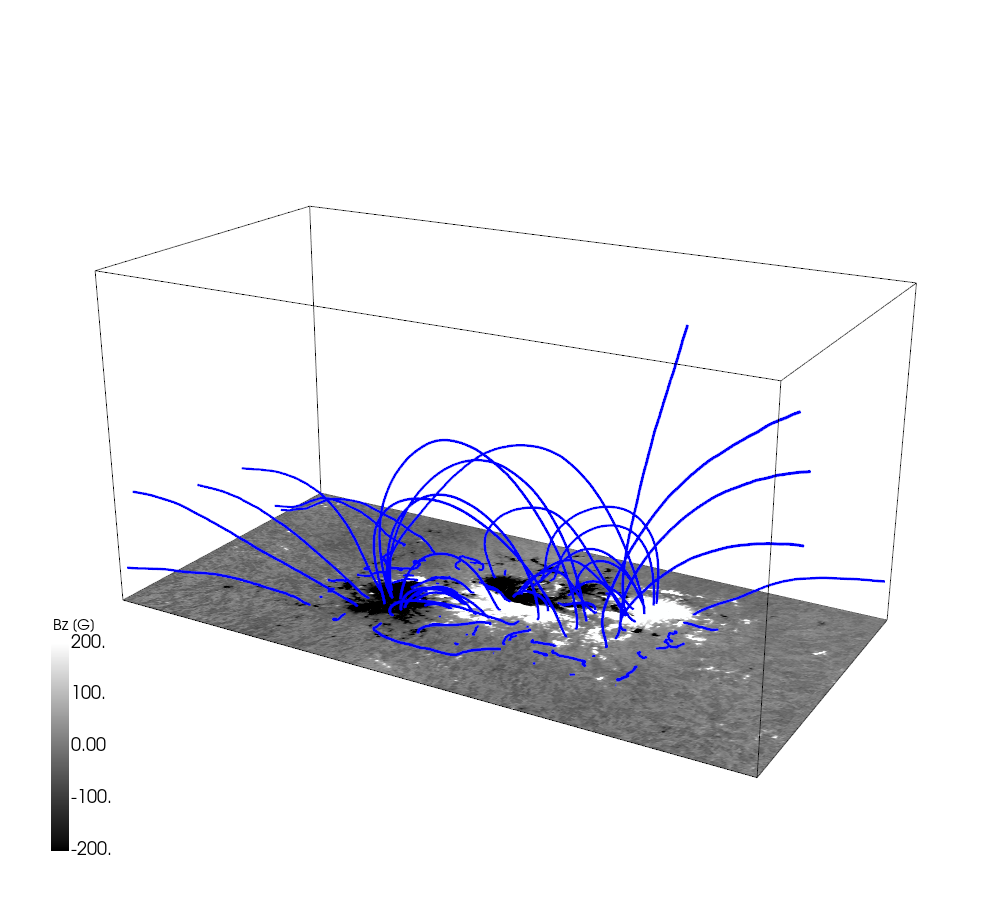

In [17]:
draw(b, radius=1)

In [18]:
res = m.evaluate(b, B)
print()
print(f"sigmaJ_b: {res['sigmaJ_b']:.4f}")
print(f"div_b   : {res['div_b']:.4f}")
print(f"sigmaJ_B: {res['sigmaJ_B']:.4f}")
print(f"div_B   : {res['div_B']:.4f}")

C_vec     : 0.96
C_cs      : 0.95
E_n'      : 0.67
E_m'      : 0.53
eps       : 0.95
sigmaJ_b  : 0.79
div_b     : 0.03
sigmaJ_B  : 0.69
div_B     : 0.00
sig100_b  : 78.95
div100_b  : 3.48
sig100_B  : 68.57
div100_B  : 0.22

sigmaJ_b: 0.7895
div_b   : 0.0348
sigmaJ_B: 0.6857
div_B   : 0.0022


# AI + Optimization

In [19]:
B = np.load('isee.npy')
b = np.load("pino.npy")

In [20]:
bottom = B[:, :, 0, :]
print(bottom.shape)

(512, 256, 3)


In [21]:
b[:, :, 0, :] = bottom

In [22]:
start_time = perf_counter()

br_pino = relax(b, 'pino_opt')

end_time = perf_counter()
total_time = end_time - start_time
print(f"Total time: {total_time:.2f}s")

nx, ny, nz =  512 256 256
Lx, Ly, Lz =  tensor(1.4156) tensor(0.7064) tensor(0.7064)
dx, dy, dz =  tensor(0.0028) tensor(0.0028) tensor(0.0028)
Bave =  tensor(179.2982)
maxit =  10000
mue =  tensor(7.6743e-07)
it =  0 L =  tensor(267.9850, device='cuda:0') F =  tensor(1279.0286, device='cuda:0') Li =  tensor(203.6972, device='cuda:0') Fi =  tensor(1248.1178, device='cuda:0')
grad L/L tensor(1., device='cuda:0')
it =  10 L =  tensor(182.0523, device='cuda:0') F =  tensor(599.2137, device='cuda:0') Li =  tensor(92.1190, device='cuda:0') Fi =  tensor(655.9245, device='cuda:0')
grad L/L tensor(0.4720, device='cuda:0')
it =  20 L =  tensor(157.9077, device='cuda:0') F =  tensor(422.4216, device='cuda:0') Li =  tensor(71.9780, device='cuda:0') Fi =  tensor(484.7354, device='cuda:0')
grad L/L tensor(0.1529, device='cuda:0')
it =  30 L =  tensor(145.0510, device='cuda:0') F =  tensor(360.7828, device='cuda:0') Li =  tensor(65.8114, device='cuda:0') Fi =  tensor(434.1030, device='cuda:0')
grad 

In [23]:
np.save("pino_opt.npy", br_pino)

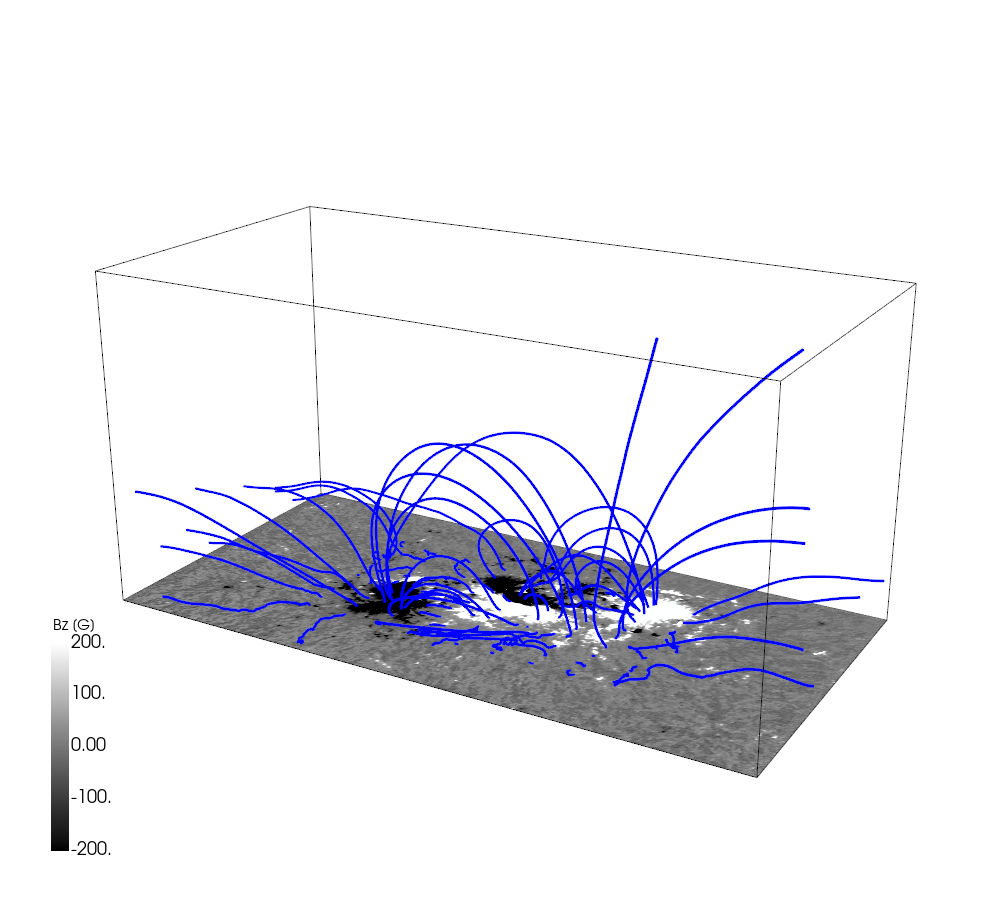

In [24]:
draw(br_pino, radius=1)

In [25]:
res = m.evaluate(br_pino, B)
print()
print(f"sigmaJ_b: {res['sigmaJ_b']:.4f}")
print(f"div_b   : {res['div_b']:.4f}")
print(f"sigmaJ_B: {res['sigmaJ_B']:.4f}")
print(f"div_B   : {res['div_B']:.4f}")

C_vec     : 0.97
C_cs      : 0.96
E_n'      : 0.70
E_m'      : 0.54
eps       : 0.99
sigmaJ_b  : 0.41
div_b     : 0.01
sigmaJ_B  : 0.69
div_B     : 0.00
sig100_b  : 41.30
div100_b  : 0.84
sig100_B  : 68.57
div100_B  : 0.22

sigmaJ_b: 0.4130
div_b   : 0.0084
sigmaJ_B: 0.6857
div_B   : 0.0022
